# Stock Lower Partial Moment Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2019-01-01' #input
end = '2020-07-01' #input
symbol = 'AMD' #input

In [3]:
stocks = yf.download(symbol, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [4]:
stocks_returns = stocks.pct_change().dropna()

In [5]:
def lpm(stock_returns):
    threshold=0.0
    order=1
    threshold_array = np.empty(len(stock_returns))
    threshold_array.fill(threshold)
    diff = threshold_array - stock_returns
    diff = diff.clip()
    return np.sum(diff ** order) / len(stock_returns)

Text(0, 0.5, 'Lower Partial Moment')

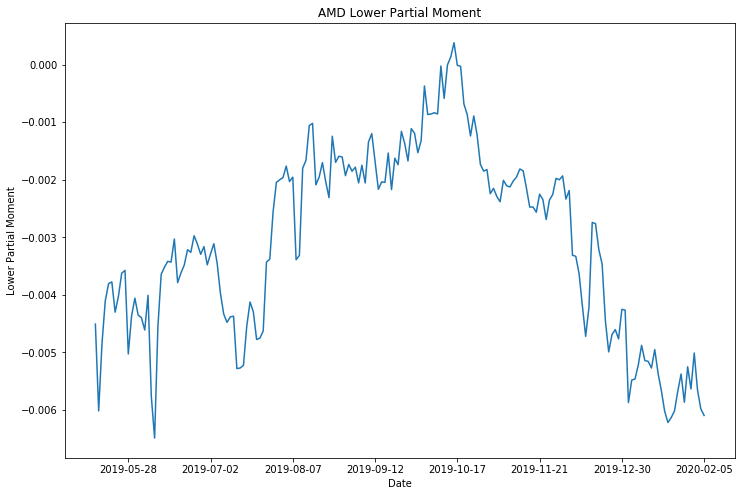

In [6]:
# Compute the running Lower Partial Moment
running = [lpm(stocks_returns[i-90:i]) for i in range(90, len(stocks_returns))]

# Plot running Lower Partial Moment up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Lower Partial Moment')
plt.xlabel('Date')
plt.ylabel('Lower Partial Moment')

In [7]:
stock_lpm = lpm(stocks_returns)
stock_lpm

-0.003408584638949311

In [8]:
running = [lpm(stocks_returns[i-90:i]) for i in range(90, len(stocks_returns))]
running

[-0.004507735034667003,
 -0.006015385881289499,
 -0.0048503558216744435,
 -0.004105460890558337,
 -0.003805922961622866,
 -0.0037744757988298857,
 -0.004301150743990844,
 -0.00402720287885057,
 -0.0036234944925169223,
 -0.003574829897982037,
 -0.005026030063290372,
 -0.0043660048620562655,
 -0.004056949224463502,
 -0.004351489792278877,
 -0.00439791065397743,
 -0.004610392471965412,
 -0.004008550134551927,
 -0.005769032556177431,
 -0.0064871108885591715,
 -0.004551780848248794,
 -0.0036424021846202647,
 -0.003518032647048752,
 -0.003417526887208949,
 -0.003430522701608939,
 -0.003029820552888275,
 -0.003787305648354111,
 -0.0036193035067675215,
 -0.003484181237850497,
 -0.0032150069529600683,
 -0.0032614915094057967,
 -0.002973443703441498,
 -0.0031173361995684803,
 -0.00329516242880593,
 -0.003161424651519846,
 -0.003479005057592492,
 -0.0032888644838588665,
 -0.0031114395855589023,
 -0.0034467039108982893,
 -0.003972211664773538,
 -0.004333486021929711,
 -0.004477167582826411,
 -0.00